In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
X = np.arange(0.0, 5.0, 0.1)
X

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9])

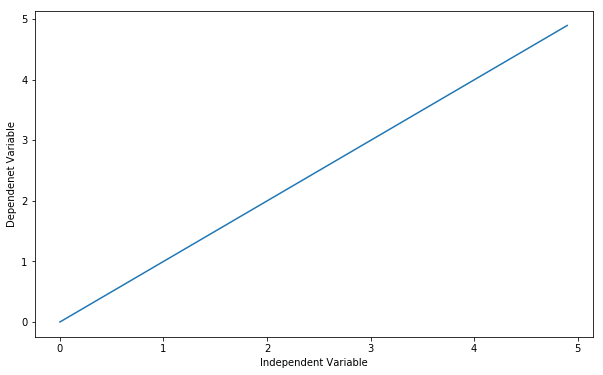

In [6]:
a = 1
b = 0

Y = a*X + b

plt.plot(X, Y)
plt.ylabel('Dependenet Variable')
plt.xlabel('Independent Variable')
plt.show()

In [7]:
x_data = np.random.rand(100).astype(np.float32)

In [10]:
y_data = x_data * 3 + 2
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(y_data)

In [12]:
zip(x_data,y_data)[0:5]

[(0.88965738, 4.7347919917877093),
 (0.10689925, 2.3200156867687283),
 (0.58194399, 3.7960410779314335),
 (0.29119903, 3.0269897184727039),
 (0.53593111, 3.7182251864977882)]

In [13]:
a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = a * x_data + b

In [15]:
loss = tf.reduce_mean(tf.square(y - y_data))

In [19]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [20]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [21]:
train_data = []
for step in range(100):
    evals = sess.run([train,a,b])[1:]
    if step % 5 == 0:
        print(step, evals)
        train_data.append(evals)

(0, [1.0, 0.2])
(5, [2.3021495, 2.3280797])
(10, [2.4656799, 2.2478299])
(15, [2.5860093, 2.1897943])
(20, [2.6742589, 2.1472304])
(25, [2.7389815, 2.1160138])
(30, [2.7864494, 2.0931196])
(35, [2.8212624, 2.0763288])
(40, [2.8467946, 2.0640142])
(45, [2.8655202, 2.0549827])
(50, [2.8792534, 2.0483592])
(55, [2.8893256, 2.0435011])
(60, [2.8967125, 2.0399382])
(65, [2.9021301, 2.0373254])
(70, [2.9061031, 2.035409])
(75, [2.9090173, 2.0340035])
(80, [2.9111545, 2.0329728])
(85, [2.9127216, 2.0322168])
(90, [2.9138713, 2.0316625])
(95, [2.9147141, 2.0312557])


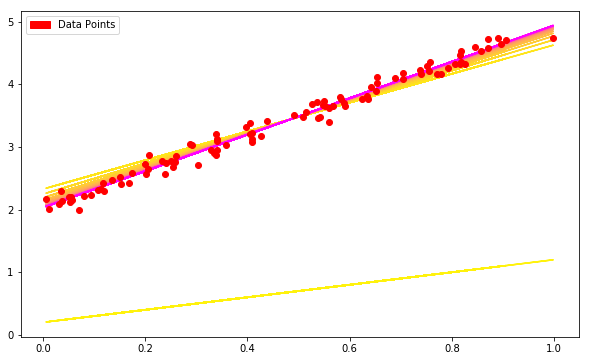

In [22]:
converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)
for f in  train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg,cb))
    
plt.plot(x_data, y_data, 'ro')

green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()